# ARIMA and Seasonal ARIMA

##  Autoregressive Integrated Moving Averages

In [39]:
# Process :- Visualize , Make time series data stationary , plot the correlation and autocorrelation charts using past data(las), constrct ARIMA model , Use model to predict

# ARIMA for Not Seasonal data if it is SARIMAX

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.columns = ['Month' , 'Scales']
df.head()

,Month,Scales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.isnull().sum()

Month     1
Scales    2
dtype: int64

In [9]:
df.shape

(107, 2)

In [10]:
df.dropna(axis=0 , inplace=True)

In [11]:
df.isnull().sum()

Month     0
Scales    0
dtype: int64

In [12]:
df.shape

(105, 2)

In [14]:
type(df['Month'][0])

str

In [15]:
df['Month'] =  pd.to_datetime(df['Month'])

In [16]:
type(df['Month'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df.head()

,Month,Scales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [18]:
df.set_index('Month' , inplace=True)

In [20]:
df.head()

,Scales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


# Visualization

<Axes: xlabel='Month'>

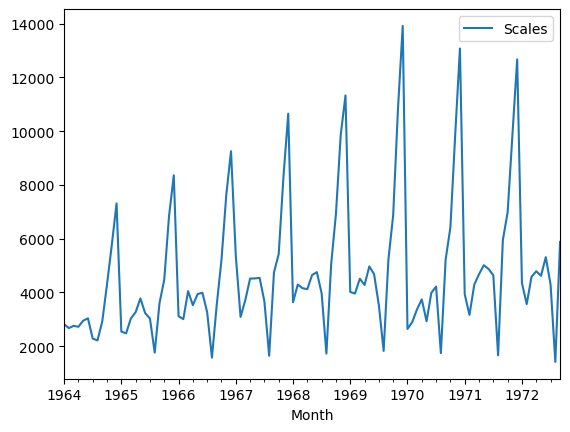

In [21]:
# it is seasonal data
df.plot()

In [22]:
# Test for Stationary or not

from statsmodels.tsa.stattools import adfuller

In [23]:
test_resut = adfuller(df['Scales'])

In [28]:
# make two assumption as it is stationary and it is not stationary

def checking(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic" , "p-value" , "Lags Used" , "Number of Obesrvation Used"]
    for value, label in zip(result , labels):
        print(label+' : '+str(value))
        
    if result[1] <= 0.05:
        print("It is Stationary")
    else:
        print("It is not stationary")

In [31]:
checking(df['Scales'])

ADF Test Statistic : -1.833593056327635
p-value : 0.36391577166023914
Lags Used : 11
Number of Obesrvation Used : 93
It is not stationary


In [32]:
## make it stationary use differancing

## Differencing

In [33]:
df['Scales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Scales, Length: 105, dtype: float64

In [34]:
df['Sales first differencing'] = df['Scales'] - df['Scales'].shift(1)

In [35]:
df['Seasonal Difference'] = df['Scales'] - df['Scales'].shift(12)

In [36]:
df.head(10)

,Scales,Sales first differencing,Seasonal Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [37]:
checking(df['Seasonal Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
Lags Used : 0
Number of Obesrvation Used : 92
It is Stationary


<Axes: xlabel='Month'>

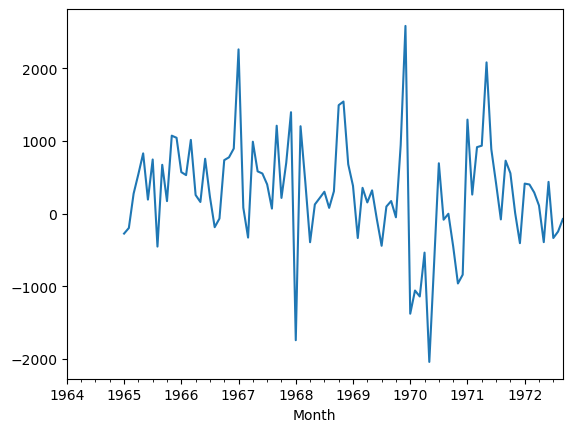

In [38]:
df['Seasonal Difference'].plot()

## Auto Regressive Model 

formula : yt = c+Q1 yt-1 ...... QnYt-n

In [40]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df['Scales'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

In [41]:
## for selecting the lags it done by auto correlation and partial auto correlation  

In [42]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

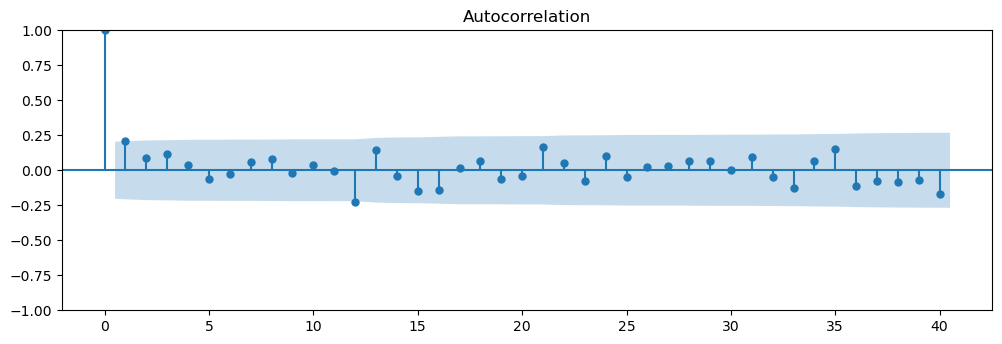

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Difference'].iloc[13:] , lags =40 , ax=ax1)

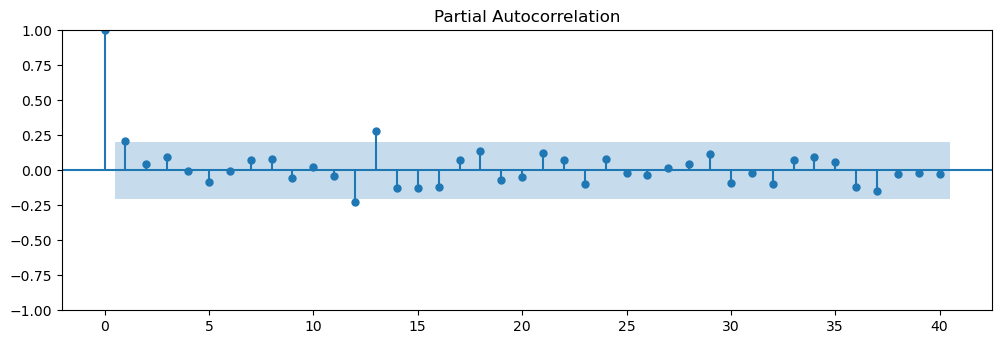

In [46]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Difference'].iloc[13:] , lags =40 , ax=ax2)

In [49]:
# The data is not seasonal so used SARIMAX
# if we it to ARIMA model then     
# we set p : Arima model = 1
# we set d : differencing = 1
# we set p : seasonal arima model = 1


from statsmodels.tsa.arima_model import ARIMA

In [51]:
model = ARIMA(df['Scales'] , order=)
model_fit = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [52]:
import statsmodels.api as sm

In [53]:
model = sm.tsa.statespace.SARIMAX(df['Scales'],order=(1,1,1),seasonal_order=(1,1,1,12))
result = model.fit()

C:\Users\darsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

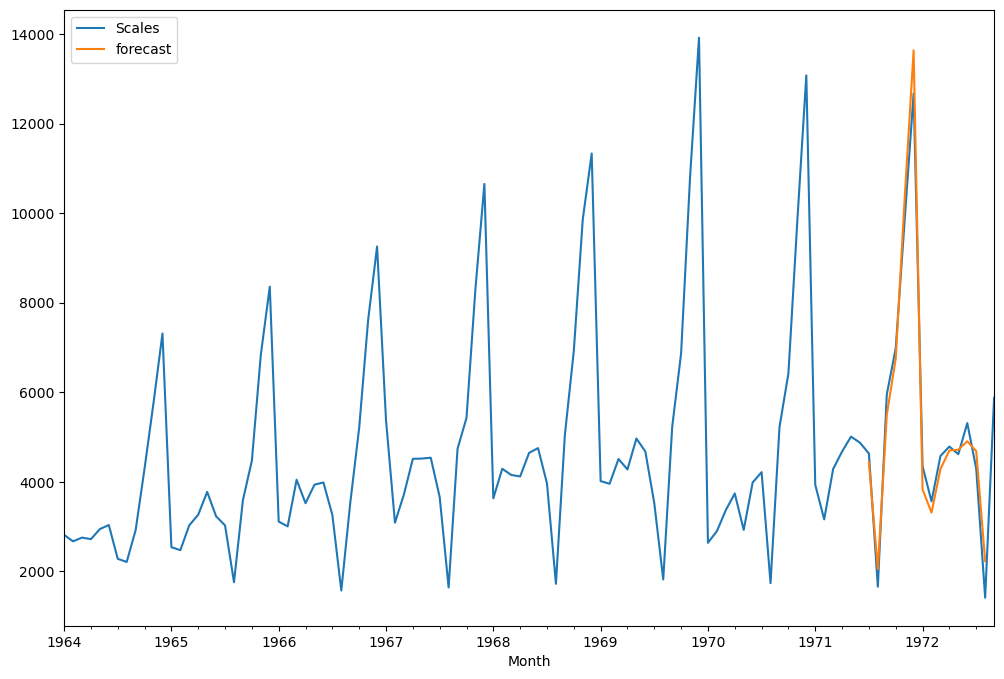

In [55]:
df['forecast'] = result.predict(start = 90 , end = 103 , dynamic=True)
df[['Scales' , 'forecast']].plot(figsize=(12 ,8))

In [57]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [58]:
future_dataset = pd.DataFrame(index=future_dates[1:] , columns=df.columns)

In [59]:
future_dataset.tail()

,Scales,Sales first differencing,Seasonal Difference,forecsst,forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [60]:
future_prediction_data = pd.concat([df , future_dataset])

<Axes: >

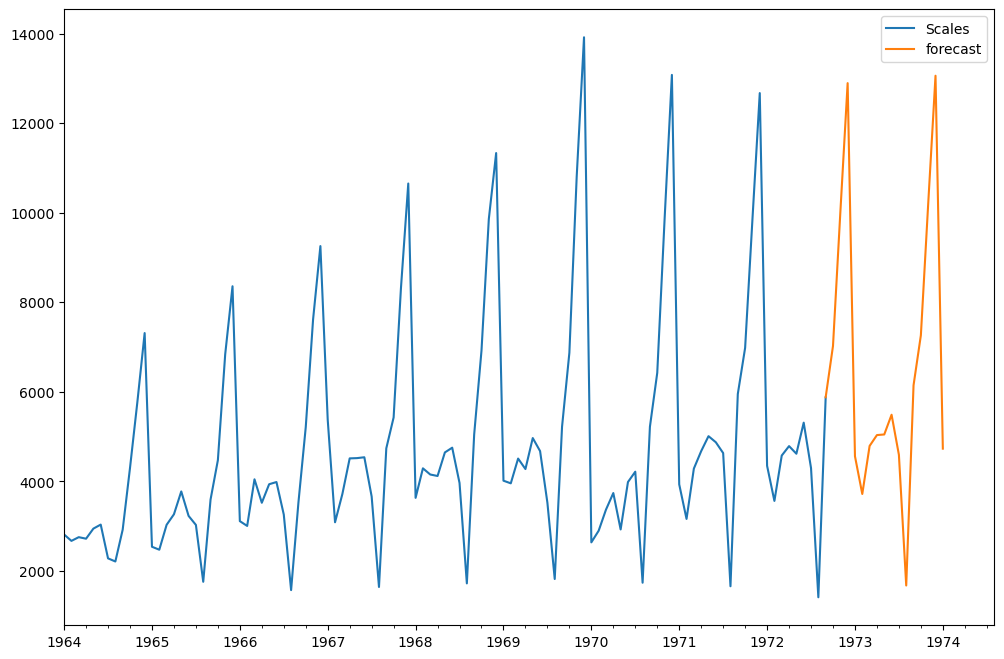

In [61]:
future_prediction_data['forecast'] = result.predict(start = 104 , end = 120 , dynamic=True)
future_prediction_data[['Scales' , 'forecast']].plot(figsize=(12 ,8))